Basic desicion tree project from **Coursera Project Network** with minor changes. </br>

In this project
* Reading a csv data 
* Some operation for dealing with missing values 
* Create DecisionTreeClassifier for classification problem (heart disease status)
* ccp_alpha paramaters and its basic optimization example
* Create confusion matrix


Original project link -> https://www.coursera.org/projects/classification-trees-in-python

**Import necessary dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Reading data 

df = pd.read_csv('/kaggle/input/heartdisease/72.csv', header =None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [6]:
# Adding predefined columns names  

df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg','thalach', 
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [15]:
# Missing values rows

df.loc[(df['ca'] =='?') | (df['thal'] == '?')  ]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [7]:
# Filtering original data out missing values rows 

df_no_missing = df.loc[ (df['ca'] != '?') & (df['thal'] != '?') ]
df_no_missing.reset_index()
df_no_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [9]:
# Creating original training dataframe (X) and target (y)  

y = df_no_missing['hd']
X = df_no_missing.drop( columns =['hd'], axis=1)
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [14]:
X['fbs'].unique()

array([1., 0.])

In [16]:
# Converting categorical(nominal) datas into numerical labels

X_encoded = pd.get_dummies(X, columns=['ca','cp', 'restecg','slope', 'thal', 'exang' ,'fbs', 'sex'] )
X_encoded

,age,restbp,chol,thalach,oldpeak,ca_0.0,ca_1.0,ca_2.0,ca_3.0,cp_1.0,...,slope_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0,sex_0.0,sex_1.0
0,63.0,145.0,233.0,150.0,2.3,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
1,67.0,160.0,286.0,108.0,1.5,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
2,67.0,120.0,229.0,129.0,2.6,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,1
3,37.0,130.0,250.0,187.0,3.5,1,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
4,41.0,130.0,204.0,172.0,1.4,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
298,45.0,110.0,264.0,132.0,1.2,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1
299,68.0,144.0,193.0,141.0,3.4,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [17]:
# We don't interested in degree of disease, thus we splitted into target values 1 and 0

y_not_zero_index = y>0
y[y>0] = 1
y.unique()

/tmp/ipykernel_32/2987218765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>0] = 1
/tmp/ipykernel_32/2987218765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>0] = 1


array([0, 1])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , random_state = 42)

In [20]:
# Creating a DecisionTreeClassifier and fitting

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

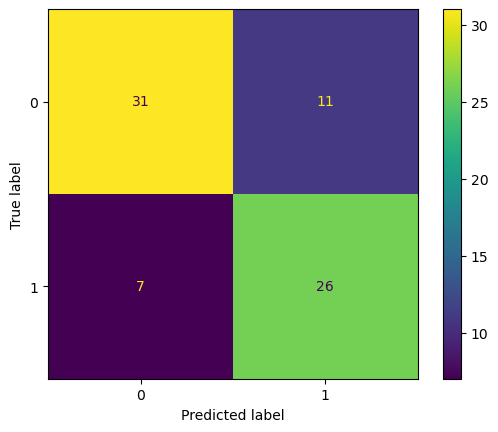

In [21]:
# Plotting confusion matrix

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

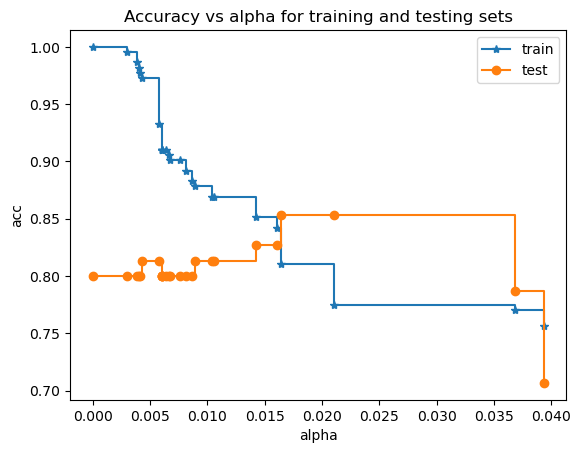

In [24]:
path = clf.cost_complexity_pruning_path(X_train , y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities 
ccp_alphas = ccp_alphas[:-1]


clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
    
    
    
    
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("acc")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='*', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<Axes: xlabel='tree'>

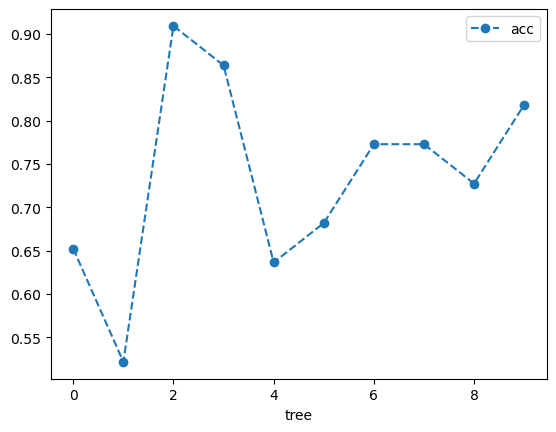

In [26]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha= 0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data = { 'tree': range(10), 'acc':scores })

df.plot(x='tree', y='acc', marker='o', linestyle='--')

In [27]:
df

,tree,acc
0,0,0.652174
1,1,0.521739
2,2,0.909091
3,3,0.863636
4,4,0.636364
5,5,0.681818
6,6,0.772727
7,7,0.772727
8,8,0.727273
9,9,0.818182


In [28]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state =0 , ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ ccp_alpha, np.mean(scores), np.std(scores) ])

In [29]:
alpha_results  = pd.DataFrame( alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.697879,0.094045
1,0.002953,0.697879,0.094045
2,0.003861,0.697879,0.094045
3,0.004054,0.697879,0.094045
4,0.004095,0.697879,0.094045
5,0.004294,0.697879,0.094045
6,0.005788,0.720606,0.103355
7,0.006006,0.720606,0.103355
8,0.006006,0.720606,0.103355
9,0.006006,0.720606,0.103355


<Axes: xlabel='alpha'>

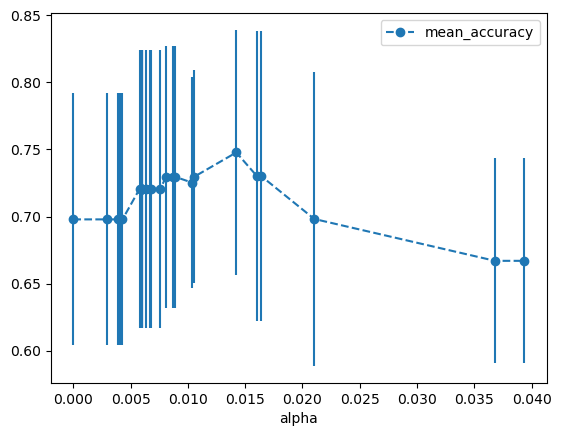

In [30]:
alpha_results.plot(x='alpha', y='mean_accuracy', yerr = 'std',  marker='o', 
                   linestyle='--')

In [31]:
ideal_ccp_alpha = 0.014225

In [32]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 


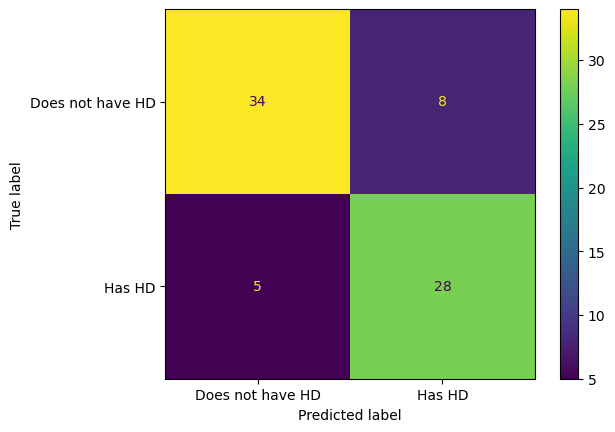

In [33]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])